In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
green_tech_data = pd.read_csv('green_tech_data.csv')
green_tech_data

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
...,...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0


In [ ]:
green_tech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [ ]:
green_tech_data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
green_tech_data.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

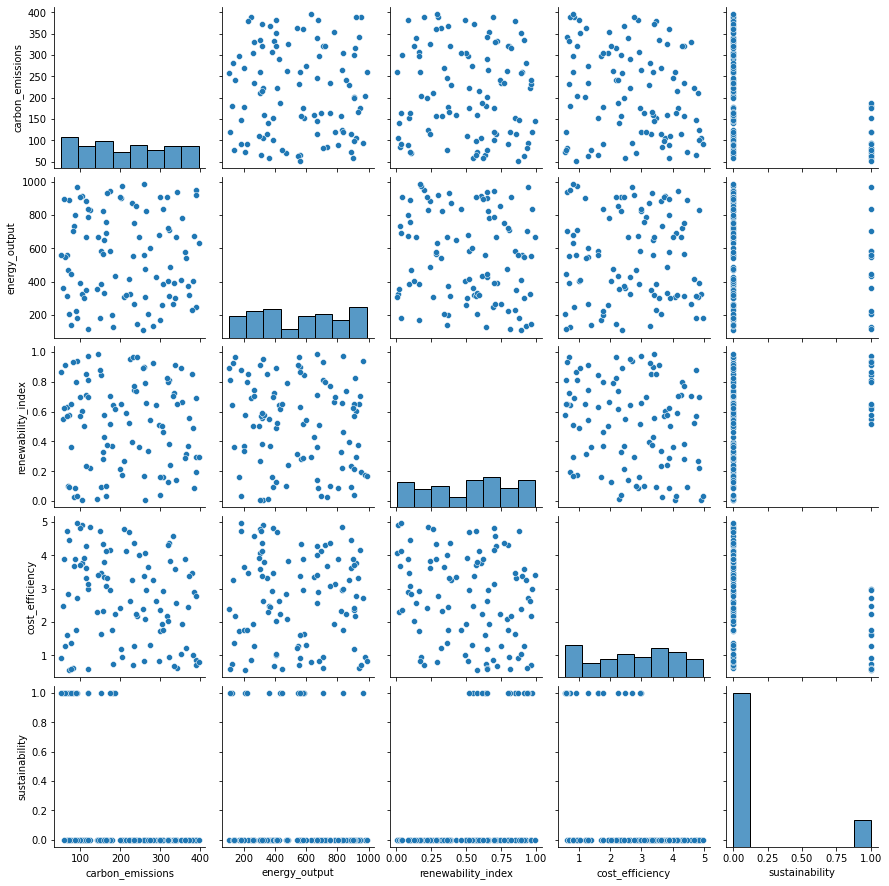

In [ ]:
sns.pairplot(green_tech_data)

<AxesSubplot:>

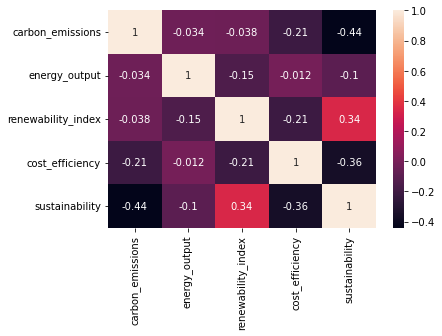

In [ ]:
sns.heatmap(green_tech_data.corr(), annot=True)

In [ ]:
X = green_tech_data.drop(['sustainability'], axis=1)
Y = green_tech_data['sustainability']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
green_tech_model= LogisticRegression()
green_tech_model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_predict =green_tech_model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print("accuracy:", accuracy*100)

accuracy: 95.0


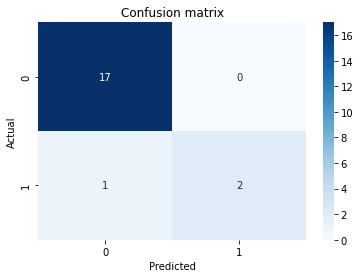

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['Not sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [ ]:
import joblib 
joblib.dump('green_tech_model.pkl', 'wb')

['wb']

In [ ]:
import pickle 
with open('green_tech_model.pkl', 'wb') as file:
    pickle.dump(green_tech_model, file)